<a href="https://colab.research.google.com/github/Vakhranev/Heritage/blob/main/t-score%20%2B%20%D1%81%D1%82%D1%83%D0%B4%D0%B5%D0%BD%D1%82%D1%8B%3A%20%D1%8F%D1%89%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Загрузка данных из CSV файла
df = pd.read_csv('sorted_bigrams_unique_t_score.csv')

# Удаление повторяющихся строк
df.drop_duplicates(inplace=True)

# Сохранение изменений в файле
df.to_csv('sorted_bigrams_unique_t_score.csv', index=False)

In [ ]:
import json
import pandas as pd
from tqdm import tqdm

# Загрузка данных из файла с частотами униграмм
with open('cococo_unigram_freq_fixed.json', 'r', encoding='utf-8') as file:
    unigrams_dict = json.load(file)

# Загрузка данных из CSV файла
df = pd.read_csv('sorted_bigrams_unique_t_score.csv')

# Преобразование данных в словарь
bigrams_dict = dict(zip(df['Bigram'], df['T_Score']))

# Функция для пересчёта t-score
def calc_t_score(bigrams_dict, unigrams_dict):
    N = sum(bigrams_dict.values())
    bigram_t = {}
    max_tscore = 0
    p_bar = tqdm(desc="calculate t-score", total=len(bigrams_dict))
    for bigram, count in bigrams_dict.items():
        w1, w2 = bigram.split()
        unigram_freq_w1 = unigrams_dict.get(w1, 0)
        unigram_freq_w2 = unigrams_dict.get(w2, 0)
        if count == 0 or unigram_freq_w1 == 0 or unigram_freq_w2 == 0:
            # Пропускаем биграммы с нулевым количеством или нулевой частотой униграмм
            continue
        E_xy = (unigram_freq_w1 + unigram_freq_w2) / N
        t_score = abs((count - E_xy) / (count ** 0.5)) # Берем абсолютное значение разницы
        bigram_t[bigram] = t_score
        if t_score > max_tscore:
            max_tscore = t_score
        p_bar.update()
    bigram_t = {bigram: bigram_t[bigram] / max_tscore for bigram in sorted(bigram_t, key=bigram_t.get, reverse=True)} # sort and normalize
    return bigram_t

# Применение функции к данным
result = calc_t_score(bigrams_dict, unigrams_dict)

# Преобразование результата в DataFrame
result_df = pd.DataFrame({'Bigram': list(result.keys()), 'T_Score': list(result.values())})

# Сохранение результата в файл
result_df.to_csv('sorted_bigrams_unique_t_score_normalized.csv', index=False)

calculate t-score:  88%|████████▊ | 3651/4160 [00:00<00:00, 222746.90it/s]


Отсутствующие файлы в LEVEL 2: 24
Отсутствующие файлы в LEVEL 3: 51
Отсутствующие файлы в LEVEL 4: 43


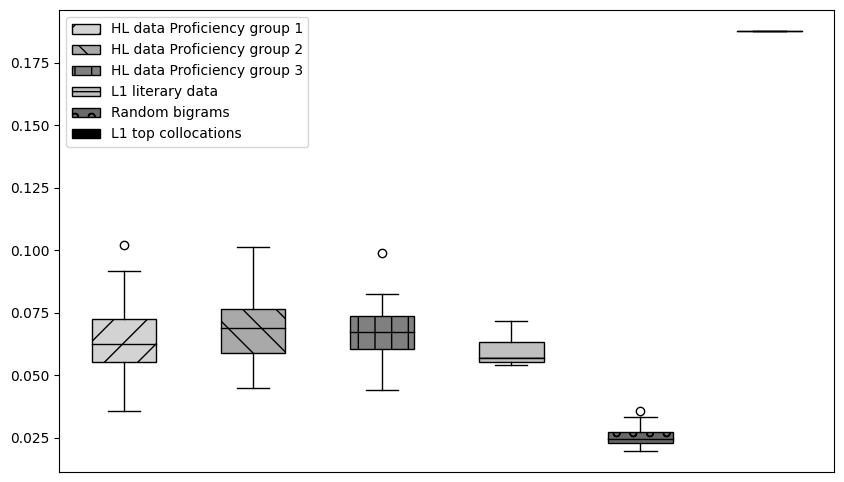

LEVEL 2:
  Min Value: 0.035552390202333944
  Lower Quartile (Q1): 0.05517963333684306
  Upper Quartile (Q3): 0.07236162388077855
  Max Value: 0.10208876448191229
  Mean Value: 0.06480497412447216

LEVEL 3:
  Min Value: 0.04480778060332716
  Lower Quartile (Q1): 0.0589335433446849
  Upper Quartile (Q3): 0.07631699431090322
  Max Value: 0.10119288623604546
  Mean Value: 0.06828826226697807

LEVEL 4:
  Min Value: 0.04418639001655464
  Lower Quartile (Q1): 0.060364781748998265
  Upper Quartile (Q3): 0.07380487327787216
  Max Value: 0.09902263327511442
  Mean Value: 0.066413262433367

lib_texts:
  Min Value: 0.05420565433568166
  Lower Quartile (Q1): 0.05535886884387787
  Upper Quartile (Q3): 0.06327895560039593
  Max Value: 0.0717036096442014
  Mean Value: 0.05956457668182604

lib_random_texts:
  Min Value: 0.01969891665073924
  Lower Quartile (Q1): 0.023095606802518695
  Upper Quartile (Q3): 0.027248526712223865
  Max Value: 0.035743795671482066
  Mean Value: 0.025385883951685846

best t-

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Функция для подсчета количества токенов в тексте
def count_tokens(text):
    return len(text.split())

# Чтение файла sorted_bigrams_unique_t_score_normalized.csv
df = pd.read_csv('sorted_bigrams_unique_t_score_normalized.csv')

# Чтение файла america_texts.json
mmr_data = {}
mmr_token_counts = {}
with open('america_texts.json', 'r') as file:
    mrr_texts_data = json.load(file)
    for text_name, text_info in mrr_texts_data.items():
        mmr_rank_unique = text_info.get('mmr_t_score_unique', 0)
        text_content = text_info.get('text', '')
        mmr_data[text_name] = mmr_rank_unique
        mmr_token_counts[text_name] = count_tokens(text_content)

# Чтение файла files_by_levels.txt
files_by_levels = {'LEVEL 2': [], 'LEVEL 3': [], 'LEVEL 4': []}
with open('files_by_levels.txt', 'r') as file:
    current_level = None
    for line in file:
        line = line.strip()
        if line.startswith('LEVEL'):
            current_level = line
        elif line:
            files_by_levels[current_level].append(line)

# Проверка наличия файлов в mmr_data
missing_files = {'LEVEL 2': [], 'LEVEL 3': [], 'LEVEL 4': []}
for level, files in files_by_levels.items():
    for file in files:
        if file not in mmr_data:
            missing_files[level].append(file)

# Печать отсутствующих файлов
for level, files in missing_files.items():
    if files:
        print(f"Отсутствующие файлы в {level}: {', '.join(files)}")

# Чтение файла lib_texts.json
lib_texts = {}
lib_token_counts = {}
with open('lib_texts.json', 'r') as file:
    lib_texts_data = json.load(file)
    for text_name, text_info in lib_texts_data.items():
        mmr_rank_unique = text_info.get('mmr_t_score_unique', 0)
        text_content = text_info.get('text', '')
        lib_texts[text_name] = mmr_rank_unique
        lib_token_counts[text_name] = count_tokens(text_content)

# Чтение файла lib_random_texts.json
lib_random_texts = {}
lib_random_collocations = 0
with open('lib_random_texts.json', 'r') as file:
    lib_random_texts_data = json.load(file)
    for text_name, text_info in lib_random_texts_data.items():
        temporal_text_name = text_name + "_"
        for text_type, text_other in text_info.items():
            if text_type == 'random_texts':
                for text_number, text_else in text_other.items():
                    temporal_text_name += text_number
                    mmr_rank_unique = text_else.get('mmr_t_score_unique')
                    text_content = text_else.get('text', '')
                    lib_random_texts[temporal_text_name] = mmr_rank_unique
                    lib_token_counts[temporal_text_name] = count_tokens(text_content)
                    temporal_text_name = text_name + "_"

# Подсчет коллокаций по количеству элементов в bigrams_freq
# Перебор каждого текста в JSON
for text_name, text_info in lib_random_texts_data.items():
    for text_type, text_other in text_info.items():
        if text_type == 'random_texts':
            for text_number, text_else in text_other.items():
                temporal_text_name = text_name + "_" + text_number
                bigrams_freq = text_else.get('bigrams_freq', {})
                lib_random_collocations += len(bigrams_freq)
                lib_token_counts[temporal_text_name] = count_tokens(text_else.get('text', ''))

# Построение диаграммы
plt.figure(figsize=(10, 6))

# Сбор данных для ящиков с усами из files_by_levels
data_to_plot = []
labels_to_plot = []
for level, files in files_by_levels.items():
    data = []
    for file in files:
        if file in mmr_data:
            data.append(mmr_data[file])
    data_to_plot.append(data)
    labels_to_plot.append(level)

# Сбор данных для ящиков с усами из lib_texts
data_to_plot.append(list(lib_texts.values()))
labels_to_plot.append('lib_texts')

# Сбор данных для ящиков с усами из lib_random_texts
data_to_plot.append(list(lib_random_texts.values()))
labels_to_plot.append('lib_random_texts')

# Рассчитываем средний t-score для файла sorted_bigrams_unique_t_score_normalized.csv
average_t_score = df['T_Score'].mean()

# Добавляем средний t-score в данные для построения диаграммы
data_to_plot.append([average_t_score])
labels_to_plot.append('best t-scores')

# Обновление словаря штриховок для новой легенды
patterns = {
    'LEVEL 2': '/',
    'LEVEL 3': '\\',
    'LEVEL 4': '|',
    'lib_texts': '-',
    'lib_random_texts': 'o',
    'best t-scores': '+'
}

# Построение ящиков с усами
bp = plt.boxplot(data_to_plot, patch_artist=True)

# Установка палитры Grayscale для ящиков
colors = ['lightgrey', 'darkgrey', 'grey', 'silver', 'dimgray', 'black']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Установка штриховок для ящиков
for patch, label in zip(bp['boxes'], labels_to_plot):
    patch.set_hatch(patterns[label])

# Установка черного цвета для медианной линии
for median in bp['medians']:
    median.set_color('black')

# Новые метки для легенды
new_labels = {
    'LEVEL 2': "HL data Proficiency group 1",
    'LEVEL 3': "HL data Proficiency group 2",
    'LEVEL 4': "HL data Proficiency group 3",
    'lib_texts': "L1 literary data",
    'lib_random_texts': "Random bigrams",
    'best t-scores': "L1 top collocations"
}

# Добавление легенды
legend_handles = [plt.Rectangle((0,0),1,1, hatch=patterns[label], edgecolor='black', facecolor=color) for label, color in zip(labels_to_plot, colors)]
plt.legend(legend_handles, [new_labels[label] for label in labels_to_plot])

# Удаление подписей с оси x
plt.xticks([])

# Показать диаграмму
plt.show()

# Вывод нижней и верхней границ ящиков (2 и 3 квартиль), среднего значения и общих границ для каждого уровня и lib_texts
for level, data in zip(labels_to_plot, data_to_plot):
    if data:  # проверка, чтобы не было пустых данных
        min_value = np.min(data)
        lower_quartile = np.percentile(data, 25)
        upper_quartile = np.percentile(data, 75)
        max_value = np.max(data)
        mean_value = np.mean(data)
        print(f"{level}:")
        print(f"  Min Value: {min_value}")
        print(f"  Lower Quartile (Q1): {lower_quartile}")
        print(f"  Upper Quartile (Q3): {upper_quartile}")
        print(f"  Max Value: {max_value}")
        print(f"  Mean Value: {mean_value}\n")
    else:
        print(f"{level}: No data available\n")

# Вывод количества токенов для каждого уровня и lib_texts
total_tokens_by_level = {}
for level, files in files_by_levels.items():
    total_tokens = sum(mmr_token_counts[file] for file in files if file in mmr_token_counts)
    total_tokens_by_level[level] = total_tokens
    print(f"{level} Total Tokens: {total_tokens}")

lib_texts_total_tokens = sum(lib_token_counts.values())
total_tokens_by_level['lib_texts'] = lib_texts_total_tokens
print(f"lib_texts Total Tokens: {lib_texts_total_tokens}")

# Вывод общего количества токенов
overall_total_tokens = sum(total_tokens_by_level.values())
print(f"Overall Total Tokens: {overall_total_tokens}")

# Подсчет количества коллокаций для топовых и рандомных текстов
top_collocations_count = df.shape[0]
random_collocations_count = len(lib_random_texts)

print(f"Top Collocations Count: {top_collocations_count}")
print(f"Random Collocations Count: {random_collocations_count}")

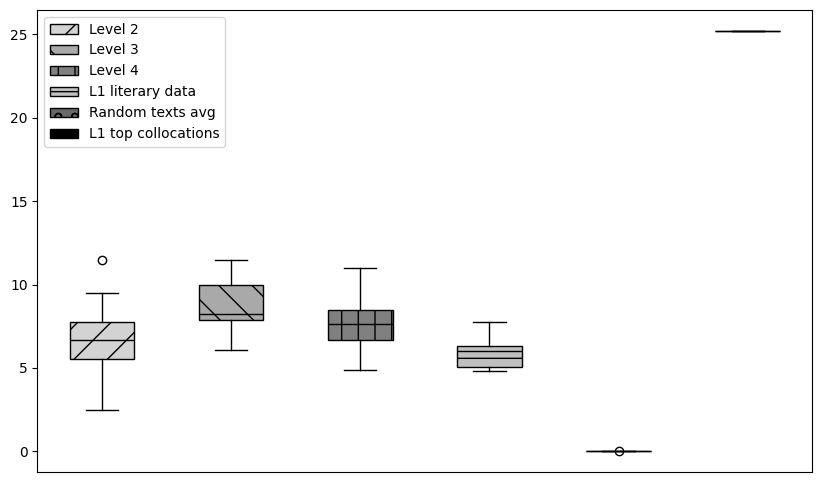

LEVEL 2:
  Min Value: 2.477058774409588
  Lower Quartile (Q1): 5.525503755917518
  Upper Quartile (Q3): 7.745476411175521
  Max Value: 11.445576940035883
  Mean Value: 6.604139266388299

LEVEL 3:
  Min Value: 6.052944437327188
  Lower Quartile (Q1): 7.878006616903473
  Upper Quartile (Q3): 9.963303333256302
  Max Value: 11.501303120111398
  Mean Value: 8.808861658383663

LEVEL 4:
  Min Value: 4.881205612340234
  Lower Quartile (Q1): 6.646625241082557
  Upper Quartile (Q3): 8.472173880927503
  Max Value: 10.995339702212192
  Mean Value: 7.612191427432237

lib_texts:
  Min Value: 4.814270323913953
  Lower Quartile (Q1): 5.085879383959082
  Upper Quartile (Q3): 6.2948214894107615
  Max Value: 7.763546198709856
  Mean Value: 5.920354840870323

random_texts:
  Min Value: 0.01969891665073924
  Lower Quartile (Q1): 0.0230956068025187
  Upper Quartile (Q3): 0.027248526712223872
  Max Value: 0.03574379567148206
  Mean Value: 0.02538588395168585

best t-scores:
  Min Value: 25.206857583215413
  

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np

def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def extract_mmr_data(texts_data):
    mmr_data = {}
    for text_name, text_info in texts_data.items():
        bigrams_unique = text_info.get("bigrams_unique", {})
        t_scores = [info["t_score"] for info in bigrams_unique.values()]
        mmr_data[text_name] = np.mean(t_scores) if t_scores else 0
    return mmr_data

def extract_random_texts_data(lib_random_texts):
    random_text_means = []

    for text_name, text_info in lib_random_texts.items():
        if "random_texts" in text_info:
            for random_text_name, random_text_info in text_info["random_texts"].items():
                bigrams_unique = random_text_info.get("bigrams_unique", {})
                t_scores = [info["t_score"] for info in bigrams_unique.values()]
                if t_scores:
                    random_text_means.append(np.mean(t_scores))

    return random_text_means

# Загрузка данных
america_texts = load_json('updated_america_texts.json')
lib_texts = load_json('updated_lib_texts.json')
lib_random_texts = load_json('updated_lib_random_texts.json')
top_t_scores = load_json('top_3651_t_scores.json')

mmr_data = extract_mmr_data(america_texts)
lib_data = extract_mmr_data(lib_texts)
random_text_means = extract_random_texts_data(lib_random_texts)

# Чтение файла files_by_levels.txt
files_by_levels = {'LEVEL 2': [], 'LEVEL 3': [], 'LEVEL 4': []}
with open('files_by_levels.txt', 'r') as file:
    current_level = None
    for line in file:
        line = line.strip()
        if line.startswith('LEVEL'):
            current_level = line
        elif line:
            files_by_levels[current_level].append(line)

# Подготовка данных для боксплотов
data_to_plot = []
labels_to_plot = []

for level, files in files_by_levels.items():
    data = [mmr_data[file] for file in files if file in mmr_data]
    data_to_plot.append(data)
    labels_to_plot.append(level)

data_to_plot.append(list(lib_data.values()))
labels_to_plot.append('lib_texts')

data_to_plot.append(random_text_means)
labels_to_plot.append('random_texts')

# Вычисляем среднее значение t-score для top_t_scores.json
mean_best_t_score = np.mean(list(top_t_scores.values()))
data_to_plot.append([mean_best_t_score])
labels_to_plot.append('best t-scores')

# Построение диаграммы
plt.figure(figsize=(10, 6))
# Обновление словаря штриховок для новой легенды
patterns = {
    'LEVEL 2': '/',
    'LEVEL 3': '\\',
    'LEVEL 4': '|',
    'lib_texts': '-',
    'random_texts': 'o',
    'best t-scores': '+'
}

# Построение ящиков с усами
bp = plt.boxplot(data_to_plot, patch_artist=True)

# Установка палитры Grayscale для ящиков
colors = ['lightgrey', 'darkgrey', 'grey', 'silver', 'dimgray', 'black']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Установка штриховок для ящиков
for patch, label in zip(bp['boxes'], labels_to_plot):
    patch.set_hatch(patterns[label])

# Установка черного цвета для медианной линии
for median in bp['medians']:
    median.set_color('black')

# Новые метки для легенды
new_labels = {
    'LEVEL 2': "Level 2",
    'LEVEL 3': "Level 3",
    'LEVEL 4': "Level 4",
    'lib_texts': "L1 literary data",
    'random_texts': "Random texts avg",
    'best t-scores': "L1 top collocations"
}

# Добавление легенды
legend_handles = [plt.Rectangle((0,0),1,1, hatch=patterns[label], edgecolor='black', facecolor=color) for label, color in zip(labels_to_plot, colors)]
plt.legend(legend_handles, [new_labels[label] for label in labels_to_plot])

# Удаление подписей с оси x
plt.xticks([])

# Показать диаграмму
plt.show()

# Вывод нижней и верхней границ ящиков (2 и 3 квартиль), среднего значения и общих границ для каждого уровня и lib_texts
for level, data in zip(labels_to_plot, data_to_plot):
    if data:  # проверка, чтобы не было пустых данных
        min_value = np.min(data)
        lower_quartile = np.percentile(data, 25)
        upper_quartile = np.percentile(data, 75)
        max_value = np.max(data)
        mean_value = np.mean(data)
        print(f"{level}:")
        print(f"  Min Value: {min_value}")
        print(f"  Lower Quartile (Q1): {lower_quartile}")
        print(f"  Upper Quartile (Q3): {upper_quartile}")
        print(f"  Max Value: {max_value}")
        print(f"  Mean Value: {mean_value}\n")
    else:
        print(f"{level}: No data available\n")

In [3]:
import json
import numpy as np
import pandas as pd

def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def extract_t_scores_by_level(texts_data, files_by_levels):
    t_scores_by_level = {level: [] for level in files_by_levels}
    for level, files in files_by_levels.items():
        for file in files:
            if file in texts_data:
                bigrams_unique = texts_data[file].get("bigrams_unique", {})
                t_scores_by_level[level].extend([info["t_score"] for info in bigrams_unique.values()])
    return t_scores_by_level

def extract_random_texts_data(lib_random_texts):
    random_text_means = []
    for text_name, text_info in lib_random_texts.items():
        if "random_texts" in text_info:
            for random_text_name, random_text_info in text_info["random_texts"].items():
                bigrams_unique = random_text_info.get("bigrams_unique", {})
                t_scores = [info["t_score"] for info in bigrams_unique.values()]
                if t_scores:
                    random_text_means.append(np.mean(t_scores))
    return random_text_means

# Загрузка данных
hl_texts = load_json('updated_america_texts.json')
l1_texts = load_json('updated_lib_texts.json')
random_texts = load_json('updated_lib_random_texts.json')
top_t_scores = load_json('top_3651_t_scores.json')

# Чтение файла files_by_levels.txt
files_by_levels = {'LEVEL 2': [], 'LEVEL 3': [], 'LEVEL 4': []}
with open('files_by_levels.txt', 'r') as file:
    current_level = None
    for line in file:
        line = line.strip()
        if line.startswith('LEVEL'):
            current_level = line
        elif line:
            files_by_levels[current_level].append(line)

# Извлечение t-score по уровням
hl_t_scores_by_level = extract_t_scores_by_level(hl_texts, files_by_levels)
l1_t_scores = extract_t_scores_by_level(l1_texts, {'L1 Literary Texts': list(l1_texts.keys())})
random_t_scores = extract_random_texts_data(random_texts)
top_t_scores_values = list(top_t_scores.values())

def compute_statistics(label, data):
    if not data:
        print(f"{label} Statistics: No Data Available\n")
        return

    data_series = pd.Series(data)
    mean_value = data_series.mean()
    median_value = data_series.median()
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [value for value in data if value < lower_bound or value > upper_bound]
    non_outliers = [value for value in data if lower_bound <= value <= upper_bound]

    print(f"{label} Statistics:")
    print(f"  Mean: {mean_value}")
    print(f"  Median: {median_value}")
    print(f"  Range: {min(data)} - {max(data)}")
    print(f"  Lower Quartile (Q1): {q1}")
    print(f"  Upper Quartile (Q3): {q3}")
    print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"  Interquartile Range: {iqr}")
    print(f"  Outliers: {outliers}")
    print(f"  Non-outliers range: {min(non_outliers)} - {max(non_outliers)}\n")

# Вычисление статистики для каждой группы
for level, data in hl_t_scores_by_level.items():
    compute_statistics(level, data)

compute_statistics("L1 Literary Texts", l1_t_scores['L1 Literary Texts'])
compute_statistics("Random Bigrams", random_t_scores)
compute_statistics("Top Collocations", top_t_scores_values)

LEVEL 2 Statistics:
  Mean: 6.4448160814414415
  Median: 1.87675554307903
  Range: -308.35021996299923 - 113.85641265632427
  Lower Quartile (Q1): 0.0
  Upper Quartile (Q3): 9.328493912256913
  Lower Bound: -13.99274086838537, Upper Bound: 23.321234780642286
  Interquartile Range: 9.328493912256913
  Outliers: [30.782477138023324, 37.238812785524075, -17.132438052793507, 69.81202536022532, -24.77328656350751, 39.684798040498215, 40.94955678585149, 30.782477138023324, 94.04704963221067, 84.67049810733495, 36.81570246993562, 38.76780648235746, 56.32542315518838, -17.738129038848008, 47.323697632302306, 93.99184298854811, 55.0937332739625, 26.142170479482193, 52.75428515703634, 28.042936393653925, 75.7460030622386, 64.39159055415955, 27.651798418936604, 27.17699277245469, 30.782477138023324, -17.132438052793507, -18.722826954995007, 34.2906289919368, 35.85852937133766, -38.77512085118114, 50.76001326460831, 52.51927011087118, -92.6523194410437, 48.208725835713636, 30.423079689210265, 36.6

In [5]:
# Подсчёт пограничных значений без учёта выбросов для каждого уровня
for i, data in enumerate(data_to_plot[:3]):
    q1 = pd.Series(data).quantile(0.25)
    q3 = pd.Series(data).quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [value for value in data if value < lower_bound or value > upper_bound]
    non_outliers = [value for value in data if value >= lower_bound and value <= upper_bound]
    print(f"LEVEL {i+2} (without outliers):")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Outliers: {outliers}")
    print(f"Non-outliers: {non_outliers}\n")

LEVEL 2 (without outliers):
Lower Bound: 2.195544773030514, Upper Bound: 11.075435394062525
Outliers: [11.445576940035883]
Non-outliers: [5.985495357208682, 5.28600713863536, 7.627529104635219, 6.8921713056973575, 8.441470511839354, 6.19791583332314, 5.605335961678238, 2.477058774409588, 9.471883549432105, 6.435190024074233, 7.3220236907097025, 8.419073741924409, 7.041557138538615, 4.833648402703395, 3.6729244534289727, 3.614764032234455, 8.099318330796429, 7.363061595937599, 5.850779440523233]

LEVEL 3 (without outliers):
Lower Bound: 4.75006154237423, Upper Bound: 13.091248407785546
Outliers: []
Non-outliers: [8.06823263406245, 8.38862820466531, 9.544787139594593, 6.052944437327188, 11.501303120111398, 7.907940325273476, 11.218851914241426, 7.788205491793467]

LEVEL 4 (without outliers):
Lower Bound: 3.9083022813151373, Upper Bound: 11.210496840694923
Outliers: []
Non-outliers: [8.627338185638836, 8.426967797474587, 9.400378720507295, 5.668140640734299, 8.386783771975827, 8.936731564

Исключительная личность -> text_0: найдено 888 биграмм, средний t-score = 0.02290315292107055
Исключительная личность -> text_1: найдено 887 биграмм, средний t-score = 0.02199283806742534
Исключительная личность -> text_2: найдено 889 биграмм, средний t-score = 0.022820342857621134
Исключительная личность -> text_3: найдено 885 биграмм, средний t-score = 0.024679267641321168
Исключительная личность -> text_4: найдено 885 биграмм, средний t-score = 0.02254530832345705
Порядок - основа жизни -> text_0: найдено 694 биграмм, средний t-score = 0.02105167987152914
Порядок - основа жизни -> text_1: найдено 690 биграмм, средний t-score = 0.023214979781148934
Порядок - основа жизни -> text_2: найдено 692 биграмм, средний t-score = 0.028169969618036594
Порядок - основа жизни -> text_3: найдено 692 биграмм, средний t-score = 0.02194978464524287
Порядок - основа жизни -> text_4: найдено 694 биграмм, средний t-score = 0.027633623446784546
Вечный командир -> text_0: найдено 597 биграмм, средний t-sc

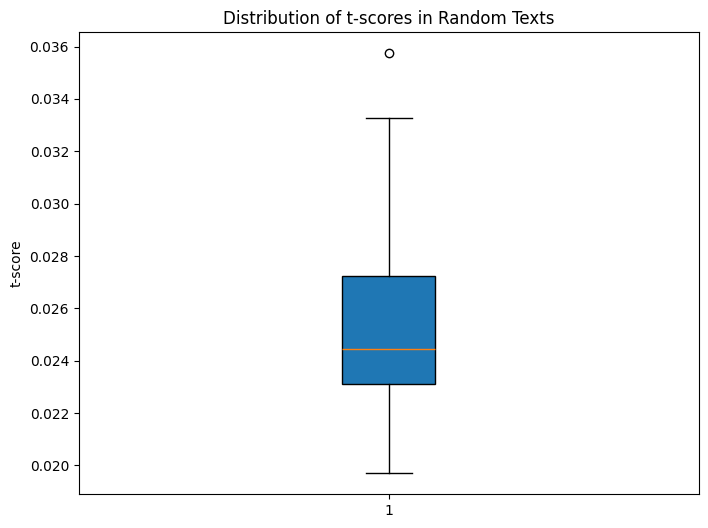

In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt

def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def extract_random_texts_t_scores(texts_data):
    random_texts_means = []

    for text_name, text_info in texts_data.items():
        if "random_texts" not in text_info:
            print(f"{text_name}: нет random_texts")
            continue

        for random_text_key, random_text_info in text_info["random_texts"].items():
            if "bigrams_unique" not in random_text_info:
                print(f"{text_name} -> {random_text_key}: нет bigrams_unique")
                continue

            t_scores = [info["t_score"] for info in random_text_info["bigrams_unique"].values()]
            mean_t_score = np.mean(t_scores) if t_scores else 0

            print(f"{text_name} -> {random_text_key}: найдено {len(t_scores)} биграмм, средний t-score = {mean_t_score}")
            random_texts_means.append(mean_t_score)

    print(f"\nНайдено {len(random_texts_means)} текстов, их средние t-score:")
    print(random_texts_means)
    return random_texts_means

# Загрузка данных
lib_random_texts = load_json('updated_lib_random_texts.json')

# Обработка данных
random_text_means = extract_random_texts_t_scores(lib_random_texts)

# Визуализация
plt.figure(figsize=(8, 6))
plt.boxplot(random_text_means, patch_artist=True)
plt.ylabel('t-score')
plt.title('Distribution of t-scores in Random Texts')
plt.show()

In [ ]:
# Подсчёт пограничных значений без учёта выбросов для каждого уровня
for i, data in enumerate(data_to_plot[:3]):
    q1 = pd.Series(data).quantile(0.25)
    q3 = pd.Series(data).quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [value for value in data if value < lower_bound or value > upper_bound]
    non_outliers = [value for value in data if value >= lower_bound and value <= upper_bound]
    print(f"LEVEL {i+2} (without outliers):")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Outliers: {outliers}")
    print(f"Non-outliers: {non_outliers}\n")

LEVEL 2 (without outliers):
Lower Bound: 0.029406647520939827, Upper Bound: 0.09813460969668178
Outliers: [0.10208876448191229]
Non-outliers: [0.04416102778971158, 0.09188216631266351, 0.05993666281461927, 0.06197428872007017, 0.08365550670186747, 0.06335419860197582, 0.06672125641061953, 0.05581244070873723, 0.07118307368967633, 0.06445105686208505, 0.040643357114606246, 0.06051549350992506, 0.04860735260095526, 0.07370827947509422, 0.06089672418274194, 0.07708493896033747, 0.051164923492866776, 0.035552390202333944, 0.07191273868267332, 0.05328121122116054, 0.08786869405286014, 0.06713535279066533, 0.06172747960717345]

LEVEL 3 (without outliers):
Lower Bound: 0.037224359231344435, Upper Bound: 0.10559436553388613
Outliers: []
Non-outliers: [0.06472554178654498, 0.0848536793951305, 0.07015206094280078, 0.0512594574891066, 0.09215089804019501, 0.057275821019555334, 0.07832292442886717, 0.06763989718063515]

LEVEL 4 (without outliers):
Lower Bound: 0.040204644455687416, Upper Bound: 0.